1970년대 후반과 1980년대 초반의 자동차 연비를 예측

데이터 준비하기

In [1]:

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import keras.utils
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop

dataset_path = tf.keras.utils.get_file(
    origin='http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
    fname='auto-mpg.data',
    extract=True)

#dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")


데이터 확인하기

In [2]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', #연비, 실린더, 배수량, 마력, 중력, 
                'Acceleration', 'Model Year', 'Origin']                 #가속, 연식, 제조국(1;USA, 2;Europe, 3;Japan)
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


데이터 정제하기

In [3]:
#isnull() Null(None, Nan 표시) 갯수 확인 
dataset.isna().sum() #is na? (not available)

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

누락된 행을 삭제

In [4]:
dataset = dataset.dropna() #drop na

"Origin" 열은 수치형이 아니고 범주형이므로 원-핫 인코딩(one-hot encoding)으로 변환

In [5]:
origin = dataset.pop('Origin') #끄집어내기, 잘라내기 (제조국끼리 비교 할 수 있도록)
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


데이터셋을 훈련 세트와 테스트 세트로 분할하기

In [6]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

특성(문제집,원인,독립변수)과 레이블(정답,결과,종속변수) 분리

In [7]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

스케일링 -> 표준화(Standardization)

In [8]:
mean = np.mean(train_dataset, axis=0)
std = np.std(train_dataset, axis=0)

train_dataset = (train_dataset - mean) / std
test_dataset = (test_dataset - mean) / std

train_dataset.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
281,0.307760,0.044943,-0.522392,-0.000299,0.948283,0.845257,0.775913,-0.465891,-0.496016
229,1.486256,1.964968,1.975275,1.459549,-1.601286,0.300266,0.775913,-0.465891,-0.496016
150,-0.870736,-0.838268,-0.312062,-0.711232,-0.021271,-0.517221,-1.288804,-0.465891,2.016065
145,-0.870736,-1.078271,-1.153381,-1.171737,1.235558,-0.517221,-1.288804,-0.465891,2.016065
182,-0.870736,-0.847868,-0.496100,-0.624591,-0.021271,0.027770,-1.288804,2.146426,-0.496016


학습모델 만들기

In [9]:
np.random.seed(7)

model = Sequential()
model.add(Dense(64, input_shape=[len(train_dataset.keys())], activation='relu'))
model.add(Dense(64,  activation='relu'))
model.add(Dense((1)))

모델 설정

In [10]:
model.compile(loss='mse',
                optimizer=RMSprop(0.001),
                metrics=['mae', 'mse'])

모델 학습하기

In [11]:
history = model.fit(train_dataset, train_labels, 
                    validation_data=(test_dataset, test_labels), epochs=500)

Epoch 1/500
10/10 [==============================] - 14s 60ms/step - loss: 581.2933 - mae: 22.8674 - mse: 581.2933 - val_loss: 554.3480 - val_mae: 22.2300 - val_mse: 554.3480
Epoch 2/500
10/10 [==============================] - 0s 5ms/step - loss: 491.8926 - mae: 20.8867 - mse: 491.8926 - val_loss: 478.1247 - val_mae: 20.5645 - val_mse: 478.1247
Epoch 3/500
10/10 [==============================] - 0s 4ms/step - loss: 450.6843 - mae: 20.0692 - mse: 450.6843 - val_loss: 398.8312 - val_mae: 18.6618 - val_mse: 398.8312
Epoch 4/500
10/10 [==============================] - 0s 4ms/step - loss: 373.7675 - mae: 18.0336 - mse: 373.7675 - val_loss: 314.7324 - val_mae: 16.4193 - val_mse: 314.7324
Epoch 5/500
10/10 [==============================] - 0s 4ms/step - loss: 284.7796 - mae: 15.3741 - mse: 284.7796 - val_loss: 234.9720 - val_mae: 13.9146 - val_mse: 234.9720
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 216.5423 - mae: 13.3066 - mse: 216.5423 - val_loss: 164.0143

모델 결과 그리기

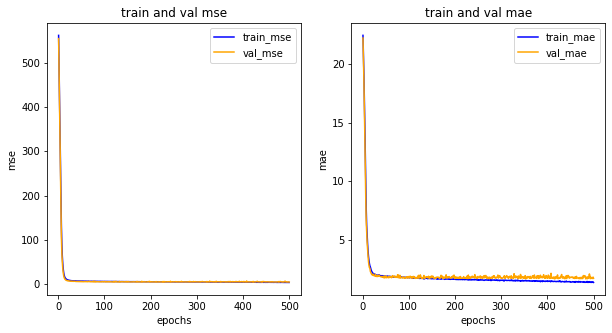

In [12]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

모델 평가하기

In [13]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 4.7367 - mae: 1.6951 - mse: 4.7367
테스트 세트의 평균 절대 오차:  1.70 MPG


모델 예측

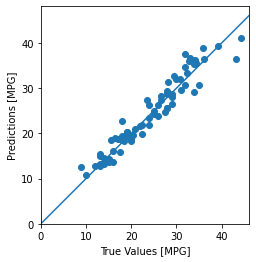

In [14]:
test_predictions = model.predict(test_dataset).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])